# NLP
---
Deri Afrianda (G1A017021)

Yogi Afrizah (G1A017012)

---

## 1. Preprocessing


In [26]:
import pandas as pd
import re
import nltk

from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
#from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer

import matplotlib.pyplot as plt

### Menyiapkan dataset

In [27]:
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')

dataset = 'drive/MyDrive/Colab Notebooks/Amazon_Unlocked_Mobile.csv'
data = pd.read_csv(dataset)
data.head()

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


,Product Name,Brand Name,Price,Rating,Reviews,Review Votes
0,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,5,I feel so LUCKY to have found this used (phone...,1.0
1,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,4,"nice phone, nice up grade from my pantach revu...",0.0
2,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,5,Very pleased,0.0
3,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,4,It works good but it goes slow sometimes but i...,0.0
4,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,4,Great phone to replace my lost phone. The only...,0.0


In [28]:
# ambil hanya pada brand samsung
data = data.loc[data['Brand Name'] == 'Samsung', 'Brand Name':'Reviews']
# ambil hanya 1000 data
data = data.iloc[0:1000]

In [29]:
data

,Brand Name,Price,Rating,Reviews
0,Samsung,199.99,5,I feel so LUCKY to have found this used (phone...
1,Samsung,199.99,4,"nice phone, nice up grade from my pantach revu..."
2,Samsung,199.99,5,Very pleased
3,Samsung,199.99,4,It works good but it goes slow sometimes but i...
4,Samsung,199.99,4,Great phone to replace my lost phone. The only...
...,...,...,...,...
184881,Samsung,149.99,1,Advertised as compatible with Verizon network....
184882,Samsung,149.99,1,Not a user friendly at all. The gal at the sto...
184883,Samsung,149.99,4,As expected!
184884,Samsung,149.99,1,Bought this unlocked phone to take overseas. O...


### Atasi data miss/null

In [30]:
data.isna().sum()                 #cek data  null

Brand Name     0
Price         17
Rating         0
Reviews        1
dtype: int64

menghapus data null

In [31]:
data = data[['Reviews', 'Rating']]
data.dropna(inplace=True)
data.isna().sum()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


Reviews    0
Rating     0
dtype: int64

### Memberi label data berdasarkan data rating

In [37]:
def labelData(rating):
  if rating >=3:
    return 1
  else:
    return 0

data['Label'] = data['Rating'].apply(labelData)
data.head(10)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


,Reviews,Rating,CleanReview,Label
0,I feel so LUCKY to have found this used (phone...,5,feel lucky find use phone use hard phone line ...,1
1,"nice phone, nice up grade from my pantach revu...",4,nice phone nice grade pantach revue clean set ...,1
2,Very pleased,5,please,1
3,It works good but it goes slow sometimes but i...,4,work good slow sometimes good phone love,1
4,Great phone to replace my lost phone. The only...,4,great phone replace lose phone thing volume bu...,1
5,I already had a phone with problems... I know ...,1,already phone problems know state use dang sta...,0
6,The charging port was loose. I got that solder...,2,charge port loose get solder need new battery ...,0
7,"Phone looks good but wouldn't stay charged, ha...",2,phone look good stay charge buy new battery st...,0
8,I originally was using the Samsung S2 Galaxy f...,5,originally use samsung galaxy sprint want retu...,1
9,It's battery life is great. It's very responsi...,3,battery life great responsive touch issue some...,1


### Text Preprocessing

In [ ]:
data[data['Reviews'].str.contains('https://')]

,Reviews,Rating,Label
182840,https://www.amazon.com/dp/B00K15KRV6/ref=cm_cr...,4,1
183323,https://www.amazon.com/dp/B00K15KRV6/ref=cm_cr...,4,1


In [34]:
lemma = WordNetLemmatizer()
#stemmer = PorterStemmer()
stop_words = set(stopwords.words('english'))

def CleanReview(txt):
  txt = re.sub(r'http\S+', ' ', txt)                                                 # hapus url
  txt = re.sub('[^a-zA-Z]','  ', txt)                                                 # hapus teks tidak relevan (karakter selain a-z)
  txt = str(txt).lower()                                                                # jadikan huruf kecil semua
  txt = word_tokenize(txt)                                                         # tokenize
  txt = [item for item in txt if item not in stop_words]           # hapus stop words ('saya' 'aku' 'kamu' dll)
  # txt = [stemmer.stem(i) for i in txt]                                         # stemming : pemotongan akhir kata
  txt = [lemma.lemmatize(word=w,pos='v') for w in txt]        # lemmatization : mengembalikan ke bentuk dasar kata
  txt = [i for i in txt if len(i) > 2]                                                # hapus kata yang kurang dari dua huruf/karakter
  txt = ' '.join(txt)                                                                        # penggabungan setiap token menjadi kalimat utuh
  return txt

data['CleanReview'] = data['Reviews'].apply(CleanReview)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [35]:
data.head()

,Reviews,Rating,CleanReview
0,I feel so LUCKY to have found this used (phone...,5,feel lucky find use phone use hard phone line ...
1,"nice phone, nice up grade from my pantach revu...",4,nice phone nice grade pantach revue clean set ...
2,Very pleased,5,please
3,It works good but it goes slow sometimes but i...,4,work good slow sometimes good phone love
4,Great phone to replace my lost phone. The only...,4,great phone replace lose phone thing volume bu...


## 2. Logistic Regression

### Vektorisasi

In [39]:
from sklearn.feature_extraction.text import CountVectorizer

cv = CountVectorizer(stop_words='english')
cv.fit(data['CleanReview'])

x = cv.transform(data['CleanReview'])
y = data['Label']

### Build Classifier

In [42]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(x, y, train_size=0.80)

In [45]:
y_test

184802    1
183440    0
184877    0
182878    0
183400    1
         ..
35        1
182902    1
182876    1
182994    1
183241    1
Name: Label, Length: 200, dtype: int64

### Mencari c yang meningkatkan akurasi

In [46]:
for c in [0.01, 0.05, 0.25, 0.5, 0.75,  1]:
  lr = LogisticRegression(C=c)
  lr.fit(X_train, y_train)
  print('Akurasi untuk c = %s: %s' %(c, accuracy_score(y_test, lr.predict(X_test))))


Akurasi untuk c = 0.01: 0.73
Akurasi untuk c = 0.05: 0.78
Akurasi untuk c = 0.25: 0.83
Akurasi untuk c = 0.5: 0.83
Akurasi untuk c = 0.75: 0.85
Akurasi untuk c = 1: 0.845


### Membuat model

In [47]:
model_final = LogisticRegression(C=0.75)
model_final.fit(x,y)

print('Accuracy score model final: %s ' %accuracy_score(y_test, model_final.predict(X_test)))

Accuracy score model final: 0.965 


## Evaluasi menggunakan Confussion Matrix


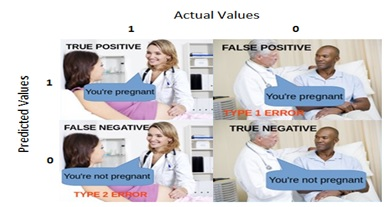

In [48]:
from sklearn.metrics import confusion_matrix

In [49]:
confusion_matrix(y_test, model_final.predict(X_test))

array([[ 49,   7],
       [  0, 144]])

In [50]:
49+7+0+144                 #jumlahkan seluruh elemen matrix

200

In [51]:
(49+144)/200

0.965

## Cobaan